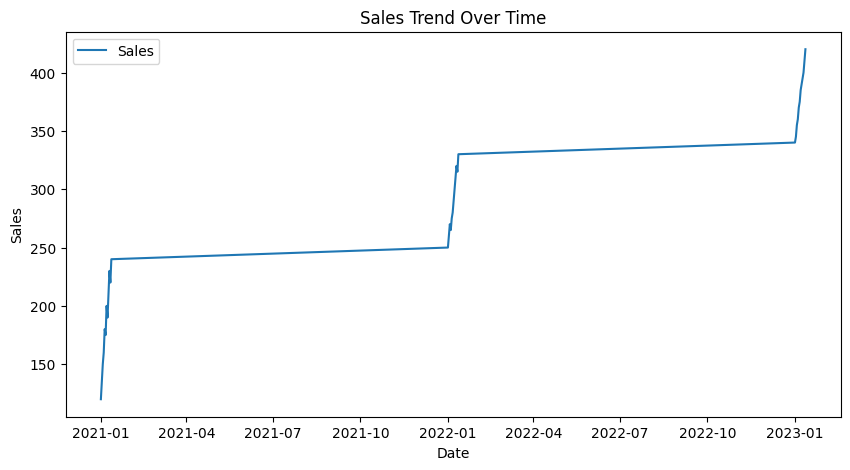

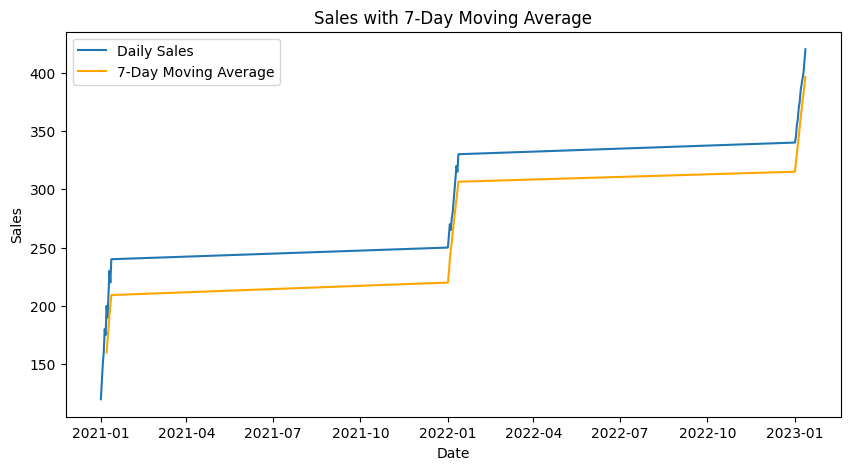

RMSE: 6.81
MAPE: 1.41%


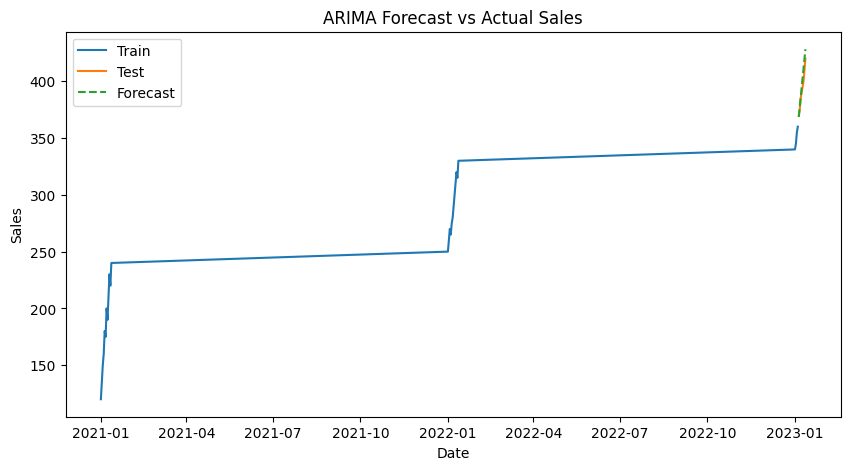

        Date  Actual_Sales  Forecasted_Sales
0 2023-01-05           370        368.532831
1 2023-01-06           375        377.065641
2 2023-01-07           385        385.598430
3 2023-01-08           390        394.131197
4 2023-01-09           395        402.663943
Confusion Matrix:
[[1 0]
 [0 1]]


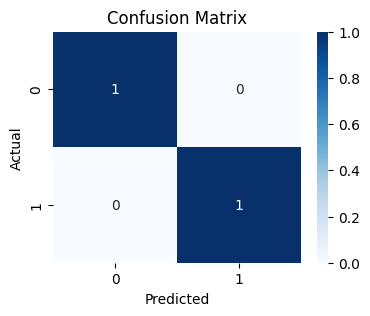

Accuracy:  1.00
Precision: 1.00
Recall:    1.00
F1 Score:  1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [2]:
# Task 6: Time Series Analysis and Heart Disease Prediction

import warnings
warnings.filterwarnings("ignore")

# --- Part 1: Time Series Analysis ---

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# 2. Load Sales Dataset
sales_df = pd.read_csv("C:\\Users\\saile\\Downloads\\sales_data (1).csv")  # Ensure this file has 'Date' and 'Sales' columns
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
sales_df = sales_df.sort_values('Date')

# 3. Visualize Sales Trends Over Time
plt.figure(figsize=(10,5))
plt.plot(sales_df['Date'], sales_df['Sales'], label='Sales')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Moving Average Plot
sales_df['Sales_MA7'] = sales_df['Sales'].rolling(window=7).mean()
plt.figure(figsize=(10,5))
plt.plot(sales_df['Date'], sales_df['Sales'], label='Daily Sales')
plt.plot(sales_df['Date'], sales_df['Sales_MA7'], label='7-Day Moving Average', color='orange')
plt.title('Sales with 7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# 4. ARIMA Forecasting
sales_series = sales_df.set_index('Date')['Sales']
train_size = int(len(sales_series) * 0.8)
train, test = sales_series[:train_size], sales_series[train_size:]

model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test))

# 5. Validate Model
rmse = np.sqrt(mean_squared_error(test, forecast))  # Fixed for older sklearn
mape = mean_absolute_percentage_error(test, forecast)
print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape:.2%}')

# 6. Forecast Plot
plt.figure(figsize=(10,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.title('ARIMA Forecast vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# 7. Forecasted Sales Table
forecasted_sales = pd.DataFrame({'Date': test.index, 'Actual_Sales': test.values, 'Forecasted_Sales': forecast.values})
print(forecasted_sales.head())

# --- Part 2: Heart Disease Prediction ---

# 1. Import Libraries (already imported above)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# 2. Load Dataset
heart_df = pd.read_csv("C:\\Users\\saile\\Downloads\\heart_disease.csv")

# 3. Data Cleaning
heart_df = heart_df.drop_duplicates()
heart_df = heart_df.dropna()

# 4. Feature Engineering
# Split 'Blood Pressure' into 'Systolic' and 'Diastolic' if needed
if heart_df['Blood Pressure'].dtype == object:
    bp_split = heart_df['Blood Pressure'].str.split('/', expand=True)
    heart_df['Systolic'] = pd.to_numeric(bp_split[0], errors='coerce')
    heart_df['Diastolic'] = pd.to_numeric(bp_split[1], errors='coerce')
    features = ['Age', 'Cholesterol', 'Systolic', 'Diastolic']
else:
    features = ['Age', 'Cholesterol', 'Blood Pressure']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
heart_df[features] = scaler.fit_transform(heart_df[features])

# Convert categorical variables if needed
df_gender = pd.get_dummies(heart_df['Gender'], drop_first=True)
heart_df = pd.concat([heart_df, df_gender], axis=1)

X = heart_df[features + list(df_gender.columns)]
y = heart_df['Heart Disease'].map({'Yes':1, 'No':0}) if heart_df['Heart Disease'].dtype == object else heart_df['Heart Disease']

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

# 7. Model Evaluation
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

import seaborn as sns
plt.figure(figsize=(4,3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f'Accuracy:  {accuracy_score(y_test, y_pred):.2f}')
print(f'Precision: {precision_score(y_test, y_pred, zero_division=0):.2f}')
print(f'Recall:    {recall_score(y_test, y_pred, zero_division=0):.2f}')
print(f'F1 Score:  {f1_score(y_test, y_pred, zero_division=0):.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, zero_division=0))